In [1]:
import sys
sys.path.append("..")

import pandas as pd
import ast  # Abstract Syntax Trees - safely parse string list to Python list
from reader import generic_reader
from inflation import read_cpi_by_year, convert_usd

In [2]:
cpi_by_year = read_cpi_by_year("inflation_data/cpiai.csv")

In [3]:
df_movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies.csv")
df_movies['genre_ids'] = df_movies['genre_ids'].apply(ast.literal_eval) # Turn genre_ids into actual Python list
df_movies['director_person_ids'] = df_movies['director_person_ids'].apply(ast.literal_eval) # Turn director_person_ids into actual Python list
df_movies.info()
df_movies.sort_values(by="budget", ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   adult                   27290 non-null  bool   
 1   backdrop_path           24958 non-null  object 
 2   budget                  27290 non-null  int64  
 3   homepage                11192 non-null  object 
 4   movie_id                27290 non-null  int64  
 5   imdb_id                 27150 non-null  object 
 6   origin_country          27290 non-null  object 
 7   original_language       27290 non-null  object 
 8   original_title          27289 non-null  object 
 9   overview                27275 non-null  object 
 10  popularity              27290 non-null  float64
 11  poster_path             27169 non-null  object 
 12  production_countries    27290 non-null  object 
 13  release_date            27290 non-null  object 
 14  revenue                 27290 non-null

,adult,backdrop_path,budget,homepage,movie_id,imdb_id,origin_country,original_language,original_title,overview,...,vote_average,vote_count,director_person_ids,genre_ids,production_company_ids,collection_id,cast_person_ids,cast_credit_ids,crew_person_ids,crew_credit_ids
25558,False,/698FjyzLdpgXmUSr63LaRwblTmx.jpg,583900000,https://www.jurassicworld.com,507086,tt8041270,['US'],en,Jurassic World Dominion,"Four years after Isla Nublar was destroyed, di...",...,6.634,6675,[930707],"[12, 28, 878]","[56, 33]",328.0,"[73457, 18997, 4784, 4783, 4785, 206425, 16398...","['5b30ddfbc3a36853140012e7', '5b30de25c3a36853...","[1546026, 1084741, 3169987, 2825529, 491, 9307...","['607745d9fbe36f0042882c44', '607745c318864b00..."
22477,False,/SPkEiZGxq5aHWQ2Zw7AITwSEo2.jpg,416000000,https://www.starwars.com/films/star-wars-episo...,181812,tt2527338,['US'],en,Star Wars: The Rise of Skywalker,The surviving Resistance faces the First Order...,...,6.300,10371,[15344],"[12, 28, 878]","[1, 11461]",10.0,"[4, 2, 1315036, 1023139, 236695, 25072, 6, 153...","['5e867292e375c000143de939', '5e8671e404b59600...","[3084035, 3508489, 3555057, 2825529, 1110521, ...","['60997cee87e63e003b6b9811', '628726963d745400..."
9515,False,/uzIGtyS6bbnJzGsPL93WCF1FWm8.jpg,379000000,https://movies.disney.com/pirates-of-the-carib...,1865,tt1298650,"['US', 'GB']",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,...,6.561,14502,[17633],"[12, 28, 14]","[2, 130, 20478]",295.0,"[85, 955, 118, 6972, 2449, 237455, 469759, 111...","['52fe431cc3a36847f803af13', '52fe431cc3a36847...","[770, 17633, 947, 1705, 1706, 406204, 1526463,...","['52fe431cc3a36847f803aedf', '52fe431cc3a36847..."
14859,False,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,365000000,https://www.marvel.com/movies/avengers-age-of-...,99861,tt2395427,['US'],en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,7.271,23747,[12891],"[28, 12, 878]",[420],86311.0,"[3223, 74568, 103, 16828, 1245, 17604, 13548, ...","['55e256d292514162cd000e40', '52fe4a449251416c...","[608, 10850, 7624, 12891, 12891, 113675, 30306...","['60b188428ee49c006dc57b28', '52fe4a449251416c..."
21360,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356000000,https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,['US'],en,Avengers: Endgame,After the devastating events of Avengers: Infi...,...,8.238,26777,"[19272, 19271]","[12, 878, 28]",[420],86311.0,"[3223, 16828, 103, 74568, 1245, 17604, 16851, ...","['5e85cd735294e700134abf26', '5e85cd84691cd500...","[3019687, 57027, 3064294, 3062791, 4230717, 27...","['6057fbdf8c44b90054683688', '606f5c67dff66e00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,False,/yDpoG6pOgIsKR4i24Y9NJ8Yvgyc.jpg,0,https://www.hallmarkchannel.com/christmas-on-c...,1180665,tt28287106,['US'],en,Christmas on Cherry Lane,Three couples at different parts of life navig...,...,6.400,25,[207749],"[10770, 35, 10749, 18]","[53015, 244270]",1359230.0,"[4493, 76996, 222906, 78044, 11153, 1485094, 2...","['6509b0788a88b2011db33c8b', '6509b082fdc4fa00...","[207749, 1705232, 1652218, 96555, 63552, 15664...","['6509b109394a87011c9ebc05', '6509b110394a8701..."
27249,False,/n0kMF7AFNXcx2enI94JIaiUjf6Y.jpg,0,https://www.greatamericanfamily.com/movie/a-ch...,1180266,tt29537749,['US'],en,Meet Me Under the Mistletoe,Two rival realtors are forced to work together...,...,5.700,14,[43426],"[10770, 35, 10749]","[64216, 2090]",NaN,"[1228355, 1761049, 1128538, 3688010, 4423064, ...","['65084808394a8700e2270a26', '6508480d394a8701...","[43426, 2370657, 1536497, 51702, 2075658, 1864...","['652166e20721660139c945c6', '65216736c50ad201..."
20,False,/xLqWQv3b3OyvoMmzT2CKT3Kohcj.jpg,0,NaN,66778,tt0190290,['US'],en,Caracara,A woman becomes entangled in the conspiracy of...,...,5.136,11,[13488],"[28, 53]",[],NaN,"[57395, 51670, 105902, 31184, 80180, 27964]","['52fe474ac3a368484e0bede9', '52fe474ac3a36848...","[13488, 119477]","['52fe474ac3a368484e0bedd

Drop movies which are documentaries, or Animation Films or Short Films

In [4]:
df_movies = df_movies[df_movies["runtime"] >= 60]
print(len(df_movies))
df_movies = df_movies[~df_movies['genre_ids'].apply(lambda genre_id: 16 in genre_id or 99 in genre_id)]
len(df_movies)

24686


20497

In [5]:
# Drop all movies which does not have excatly one director
df_movies = df_movies[df_movies['director_person_ids'].apply(lambda x: len(x) == 1)]
df_movies['director'] = df_movies['director_person_ids'].apply(lambda x: x[0])

In [6]:
columns_to_keep = ['movie_id', 'original_title', 'release_date', 'budget', 'revenue', 'vote_average', 'vote_count', 'director', 'director_person_ids', 'genre_ids']
df_movies = df_movies[columns_to_keep].copy()
df_movies

,movie_id,original_title,release_date,budget,revenue,vote_average,vote_count,director,director_person_ids,genre_ids
1,300236,Carnage: The Legend of Quiltface,2000-01-01,0,0,2.500,10,103123,[103123],[27]
2,96716,The Bumblebee Flies Anyway,2000-01-01,0,0,6.200,30,126537,[126537],"[18, 10749]"
3,71618,After Sex,2000-01-01,0,0,5.000,27,176312,[176312],"[35, 18, 10749]"
5,56721,The Mummy Theme Park,2000-01-01,0,0,4.000,14,1595512,[1595512],[27]
7,48235,The Complete Works of William Shakespeare (Abr...,2000-01-01,0,0,7.100,10,930753,[930753],[35]
...,...,...,...,...,...,...,...,...,...,...
27281,994108,All of Us Strangers,2023-12-22,5000000,14864960,7.443,898,586002,[586002],"[10749, 18, 14]"
27282,979097,Memory,2023-12-22,0,313000,7.093,176,1082434,[1082434],[18]
27284,1180358,A Royal Christmas Holiday,2023-12-23,0,0,5.800,11,31155,[31155],"[10770, 35, 10749]"
27285,823452,The Boys in the Boat,2023-12-25,40000000,54401583,7.233,311,1461,[1461],"[18, 36]"


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19351 entries, 1 to 27286
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             19351 non-null  int64  
 1   original_title       19351 non-null  object 
 2   release_date         19351 non-null  object 
 3   budget               19351 non-null  int64  
 4   revenue              19351 non-null  int64  
 5   vote_average         19351 non-null  float64
 6   vote_count           19351 non-null  int64  
 7   director             19351 non-null  int64  
 8   director_person_ids  19351 non-null  object 
 9   genre_ids            19351 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 1.6+ MB


In [8]:
# Drop movies where budget is zero
df_movies = df_movies[df_movies['budget'] != 0].copy()
# df_movies = df_movies[(df_movies['budget'] != 0) & (df_movies['revenue'] != 0)].copy()
len(df_movies)

5898

In [9]:
# Convert release_date into proper datetime objects
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

# Create year column
df_movies['release_year'] = df_movies['release_date'].dt.year
df_movies.sort_values(by="release_year", ascending=False)

,movie_id,original_title,release_date,budget,revenue,vote_average,vote_count,director,director_person_ids,genre_ids,release_year
27220,664341,Eileen,2023-12-01,16000000,1560142,5.937,319,1661862,[1661862],"[53, 80]",2023
26957,958006,The Kill Room,2023-09-14,50000000,476375,5.949,263,1242819,[1242819],"[35, 80]",2023
27285,823452,The Boys in the Boat,2023-12-25,40000000,54401583,7.233,311,1461,[1461],"[18, 36]",2023
27162,1071215,Thanksgiving,2023-11-16,15000000,46553280,6.500,1419,16847,[16847],"[27, 9648]",2023
27281,994108,All of Us Strangers,2023-12-22,5000000,14864960,7.443,898,586002,[586002],"[10749, 18, 14]",2023
...,...,...,...,...,...,...,...,...,...,...,...
180,3536,U-571,2000-04-20,62000000,127700000,6.516,1286,7213,[7213],"[10752, 28, 12]",2000
182,18041,Gossip,2000-04-21,14000000,5108820,5.807,254,19012,[19012],"[9648, 53]",2000
183,14736,Love & Basketball,2000-04-21,20000000,27728118,7.374,445,71947,[71947],"[35, 18, 10749]",2000
184,1443,The Virgin Suicides,2000-04-21,6000000,10409377,7.120,3444,1769,[1769],"[18, 10749]",2000


In [10]:
# Convert budget to 2023 USD
df_movies['budget_2023_usd'] = df_movies.apply(
    lambda row: convert_usd(
        original_amount=row['budget'],
        original_year=row['release_year'],
        new_year=2023,
        cpi_by_year=cpi_by_year
    ),
    axis=1
)

# Convert revenue to 2023 USD
df_movies['revenue_2023_usd'] = df_movies.apply(
    lambda row: convert_usd(
        original_amount=row['revenue'],
        original_year=row['release_year'],
        new_year=2023,
        cpi_by_year=cpi_by_year
    ),
    axis=1
)

In [11]:
df_movies
df_movies.sort_values(by="budget_2023_usd", ascending=False)

,movie_id,original_title,release_date,budget,revenue,vote_average,vote_count,director,director_person_ids,genre_ids,release_year,budget_2023_usd,revenue_2023_usd
25558,507086,Jurassic World Dominion,2022-06-01,583900000,1004004592,6.634,6675,930707,[930707],"[12, 28, 878]",2022,607935300,1045332818
9515,1865,Pirates of the Caribbean: On Stranger Tides,2011-05-15,379000000,1046721266,6.561,14502,17633,[17633],"[12, 28, 14]",2011,513391695,1417883919
22477,181812,Star Wars: The Rise of Skywalker,2019-12-18,416000000,1074144248,6.300,10371,15344,[15344],"[12, 28, 878]",2019,495803565,1280203240
14859,99861,Avengers: Age of Ultron,2015-04-22,365000000,1405403694,7.271,23747,12891,[12891],"[28, 12, 878]",2015,469232494,1806742684
5365,285,Pirates of the Caribbean: At World's End,2007-05-19,300000000,961691209,7.262,14944,1704,[1704],"[12, 14, 28]",2007,440867221,1413260435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,20034,Hush,2008-08-13,1,0,5.600,155,86482,[86482],"[53, 27, 28]",2008,1,0
7129,123883,Ice Dreams,2009-01-23,1,0,6.400,21,150971,[150971],"[10749, 10770, 18, 10751]",2009,1,0
21031,571055,Down,2019-02-01,1,0,6.800,246,120245,[120245],"[27, 53, 10770]",2019,1,0
10638,221161,Devoured,2012-05-05,1,0,5.511,46,147900,[147900],"[53, 27, 18]",2012,1,0


Calculate profit and ROI

In [12]:
df_movies['profit_2023_usd'] = df_movies['revenue_2023_usd'] - df_movies['budget_2023_usd']
df_movies['roi'] = ( df_movies['profit_2023_usd'] / df_movies['budget_2023_usd'] )*100
df_movies.sort_values(by="profit_2023_usd", ascending=False)

,movie_id,original_title,release_date,budget,revenue,vote_average,vote_count,director,director_person_ids,genre_ids,release_year,budget_2023_usd,revenue_2023_usd,profit_2023_usd,roi
8039,19995,Avatar,2009-12-15,237000000,2923706026,7.600,32656,2710,[2710],"[28, 12, 14, 878]",2009,336605225,4152467198,3815861973,1133.631236
15905,140607,Star Wars: The Force Awakens,2015-12-15,245000000,2068223624,7.300,19987,15344,[15344],"[12, 28, 878]",2015,314964276,2658843091,2343878815,744.172909
26268,76600,Avatar: The Way of Water,2022-12-14,350000000,2320250281,7.610,12904,2710,[2710],"[878, 12, 28]",2022,364407184,2415759634,2051352450,562.928652
15039,135397,Jurassic World,2015-06-06,150000000,1671537444,6.699,21021,930707,[930707],"[28, 12, 878, 53]",2015,192835271,2148875843,1956040572,1014.358298
25098,634649,Spider-Man: No Way Home,2021-12-15,200000000,1921847111,7.939,21154,1293994,[1293994],"[28, 12, 878]",2021,224897121,2161089412,1936192291,860.923556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22433,509967,6 Underground,2019-12-10,150000000,0,6.300,4962,865,[865],"[28, 35, 53]",2019,178775324,0,-178775324,-100.000000
24881,512195,Red Notice,2021-11-04,160000000,178143,6.756,6116,57633,[57633],"[28, 35, 80]",2021,179917697,200319,-179717378,-99.888661
22234,398978,The Irishman,2019-11-01,159000000,968853,7.583,7178,1032,[1032],"[80, 18, 36]",2019,189501843,1154713,-188347130,-99.390659
24639,588228,The Tomorrow War,2021-09-03,200000000,14400000,7.491,3826,144816,[144816],"[28, 878, 12]",2021,224897121,16192593,-208704528,-92.800000


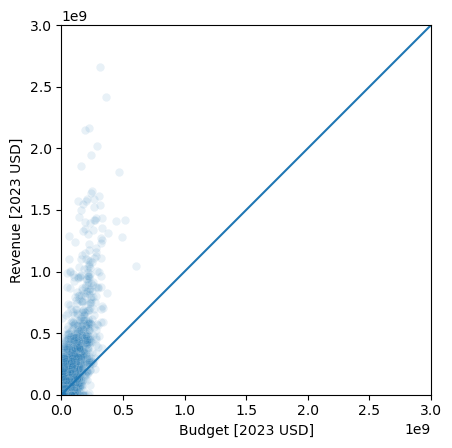

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['revenue_2023_usd'], alpha=0.1)
plt.xlim(0, 3e9)
plt.ylim(0, 3e9)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 3e9], [0, 3e9])
plt.xlabel("Budget [2023 USD]")
plt.ylabel("Revenue [2023 USD]");

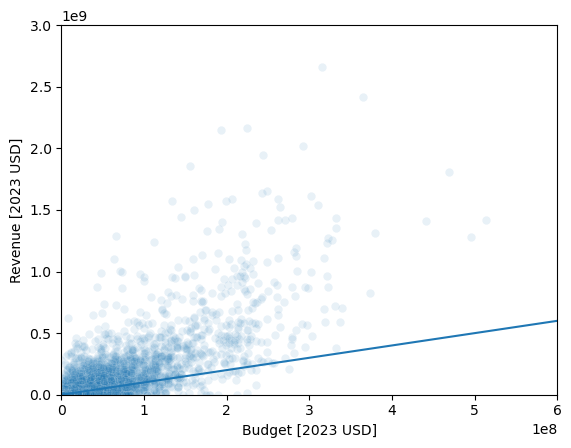

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['revenue_2023_usd'], alpha=0.1)
plt.xlim(0, 0.6e9)
plt.ylim(0, 3e9)
# plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 3e9], [0, 3e9])
plt.xlabel("Budget [2023 USD]")
plt.ylabel("Revenue [2023 USD]");

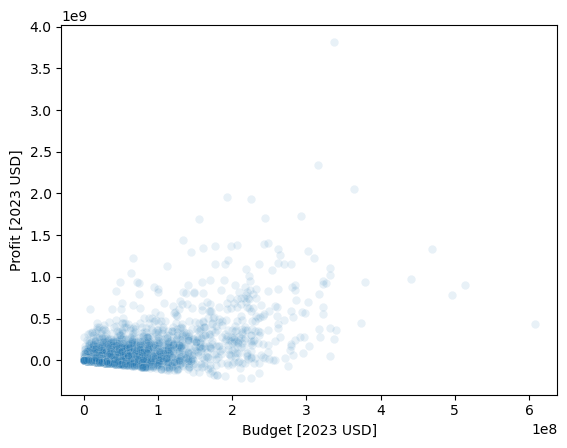

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['profit_2023_usd'], alpha=0.1)
# plt.xlim(0, 0.6e9)
# plt.ylim(0, 3e9)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.plot([0, 3e9], [0, 3e9])
plt.xlabel("Budget [2023 USD]")
plt.ylabel("Profit [2023 USD]");

<Axes: xlabel='budget_2023_usd', ylabel='vote_average'>

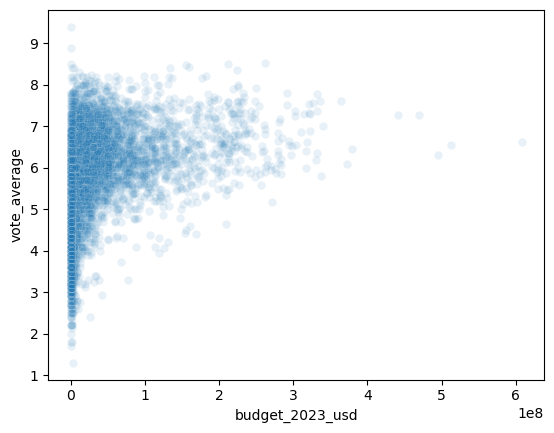

In [16]:
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['vote_average'], alpha=0.1)

<Axes: xlabel='profit_2023_usd', ylabel='vote_average'>

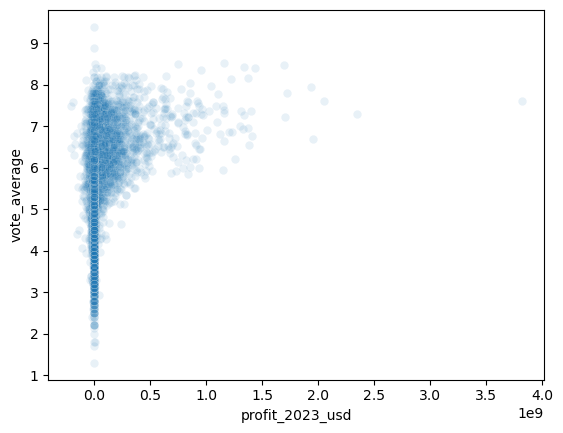

In [17]:
sns.scatterplot(x=df_movies['profit_2023_usd'], y=df_movies['vote_average'], alpha=0.1)

(-100.0, 2000.0)

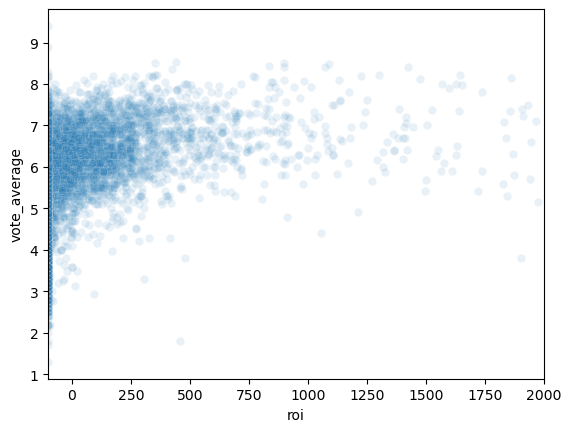

In [18]:
sns.scatterplot(x=df_movies['roi'], y=df_movies['vote_average'], alpha=0.1)
plt.xlim(-100, 2000)

In [19]:
# # Define a function for rating_category
# def get_rating_category(vote_average):
#     if vote_average >= 7:
#         return "good";
#     if vote_average >= 5:
#         return "ok";
#     else:
#         return "bad";
    
# Define a function for rating_category
def get_rating_category(vote_average):
    if vote_average >= 6:
        return "good";
    else:
        return "bad";

# Apply the function to df_movies 
df_movies['rating_category'] = df_movies['vote_average'].apply(get_rating_category)
df_movies.sort_values(by="vote_average", ascending=False)

,movie_id,original_title,release_date,budget,revenue,vote_average,vote_count,director,director_person_ids,genre_ids,release_year,budget_2023_usd,revenue_2023_usd,profit_2023_usd,roi,rating_category
10614,246895,Complacent,2012-05-01,500000,0,9.400,14,88039,[88039],[18],2012,663566,0,-663566,-100.000000,good
16060,631303,The Devil's Hour,2016-02-02,115000,0,8.900,14,2411023,[2411023],"[27, 18, 53]",2016,145998,0,-145998,-100.000000,good
6496,155,The Dark Knight,2008-07-16,185000000,1004558444,8.523,34473,525,[525],"[18, 28, 80, 53]",2008,261816713,1421676703,1159859990,443.004565,good
14232,157336,Interstellar,2014-11-05,165000000,746606706,8.500,37950,525,[525],"[12, 18, 878]",2014,212370429,960952645,748582216,352.488913,good
20478,554386,Evanescence: Synthesis Live,2018-10-12,100000,1000000,8.500,68,1108767,[1108767],[10402],2018,121343,1213434,1092091,900.003296,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25947,949544,Debbie Does Demons,2022-10-01,3045,0,2.000,11,97814,[97814],[27],2022,3170,0,-3170,-100.000000,bad
14272,295884,Saving Christmas,2014-11-14,500000,2800000,1.800,96,99388,[99388],"[35, 14]",2014,643547,3603862,2960315,459.999814,bad
9192,118332,Total Retribution,2011-02-02,1500000,0,1.800,13,98360,[98360],"[27, 878, 53]",2011,2031893,0,-2031893,-100.000000,bad
213,203023,Witchcraft XI: Sisters in Blood,2000-05-09,40,0,1.700,11,98712,[98712],[27],2000,71,0,-71,-100.000000,bad


In [20]:
# # Drop all movies with rating 'bad'
# df_movies = df_movies[df_movies['rating_category'] != 'bad'].copy()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode target variable
le_rating = LabelEncoder()
df_movies['rating_encoded'] = le_rating.fit_transform(df_movies['rating_category'])
df_movies

# Independet variables (X) and dependent variable (y)
X = df_movies[['budget_2023_usd', 'director']]
y = df_movies['rating_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

# Train model
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=le_rating.classes_))

              precision    recall  f1-score   support

         bad       0.63      0.65      0.64       723
        good       0.65      0.64      0.65       752

    accuracy                           0.64      1475
   macro avg       0.64      0.64      0.64      1475
weighted avg       0.64      0.64      0.64      1475

